# Import tools

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline

import matplotlib.pyplot as plt

# Download data


In [3]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
cardio_df = df.copy()

In [50]:
cardio_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [51]:
cardio_df.shape

(918, 12)

In [52]:
cardio_df.duplicated().sum()

0

In [53]:
## To drop Duplicate items
cardio_df.drop_duplicates(inplace=True)

In [54]:
cardio_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [55]:
cardio_df.shape

(918, 12)

# Cleaning

In [65]:
cardio_df['Sex'].replace({'F':0, 'M':1}, inplace=True)




In [66]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [67]:
cardio_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
cardio_df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [82]:
list_cp= cardio_df['ChestPainType'].unique()
print(list_cp)

['ATA' 'NAP' 'ASY' 'TA']


In [83]:


ordinal_transform = OrdinalEncoder(categories=[list_cp])
cardio_df['ChestPainType'] = ordinal_transform.fit_transform(cardio_df[['ChestPainType']])

In [86]:
list_restecg= cardio_df['RestingECG'].unique()
print(list_restecg)

['Normal' 'ST' 'LVH']


In [87]:
ordinal_transform = OrdinalEncoder(categories=[list_restecg])
cardio_df['RestingECG'] = ordinal_transform.fit_transform(cardio_df[['RestingECG']])

In [88]:
list_exng= cardio_df['ExerciseAngina'].unique()
print(list_exng)
ordinal_transform = OrdinalEncoder(categories=[list_exng])
cardio_df['ExerciseAngina'] = ordinal_transform.fit_transform(cardio_df[['ExerciseAngina']])

['N' 'Y']


In [89]:
list_slp= cardio_df['ST_Slope'].unique()
print(list_slp)
ordinal_transform = OrdinalEncoder(categories=[list_slp])
cardio_df['ST_Slope'] = ordinal_transform.fit_transform(cardio_df[['ST_Slope']])

['Up' 'Flat' 'Down']


In [90]:
cardio_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0.0,140,289,0,0.0,172,0.0,0.0,0.0,0
1,49,0,1.0,160,180,0,0.0,156,0.0,1.0,1.0,1
2,37,1,0.0,130,283,0,1.0,98,0.0,0.0,0.0,0
3,48,0,2.0,138,214,0,0.0,108,1.0,1.5,1.0,1
4,54,1,1.0,150,195,0,0.0,122,0.0,0.0,0.0,0


(1    508
 0    410
 Name: HeartDisease, dtype: int64,
 <AxesSubplot:xlabel='HeartDisease', ylabel='count'>)

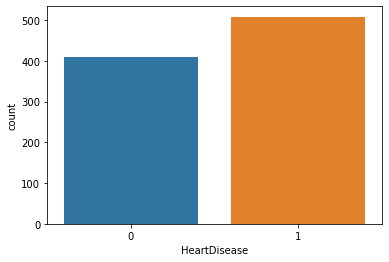

In [91]:
# View if dataset is balanced
cardio_df["HeartDisease"].value_counts(),sns.countplot(x=cardio_df["HeartDisease"])


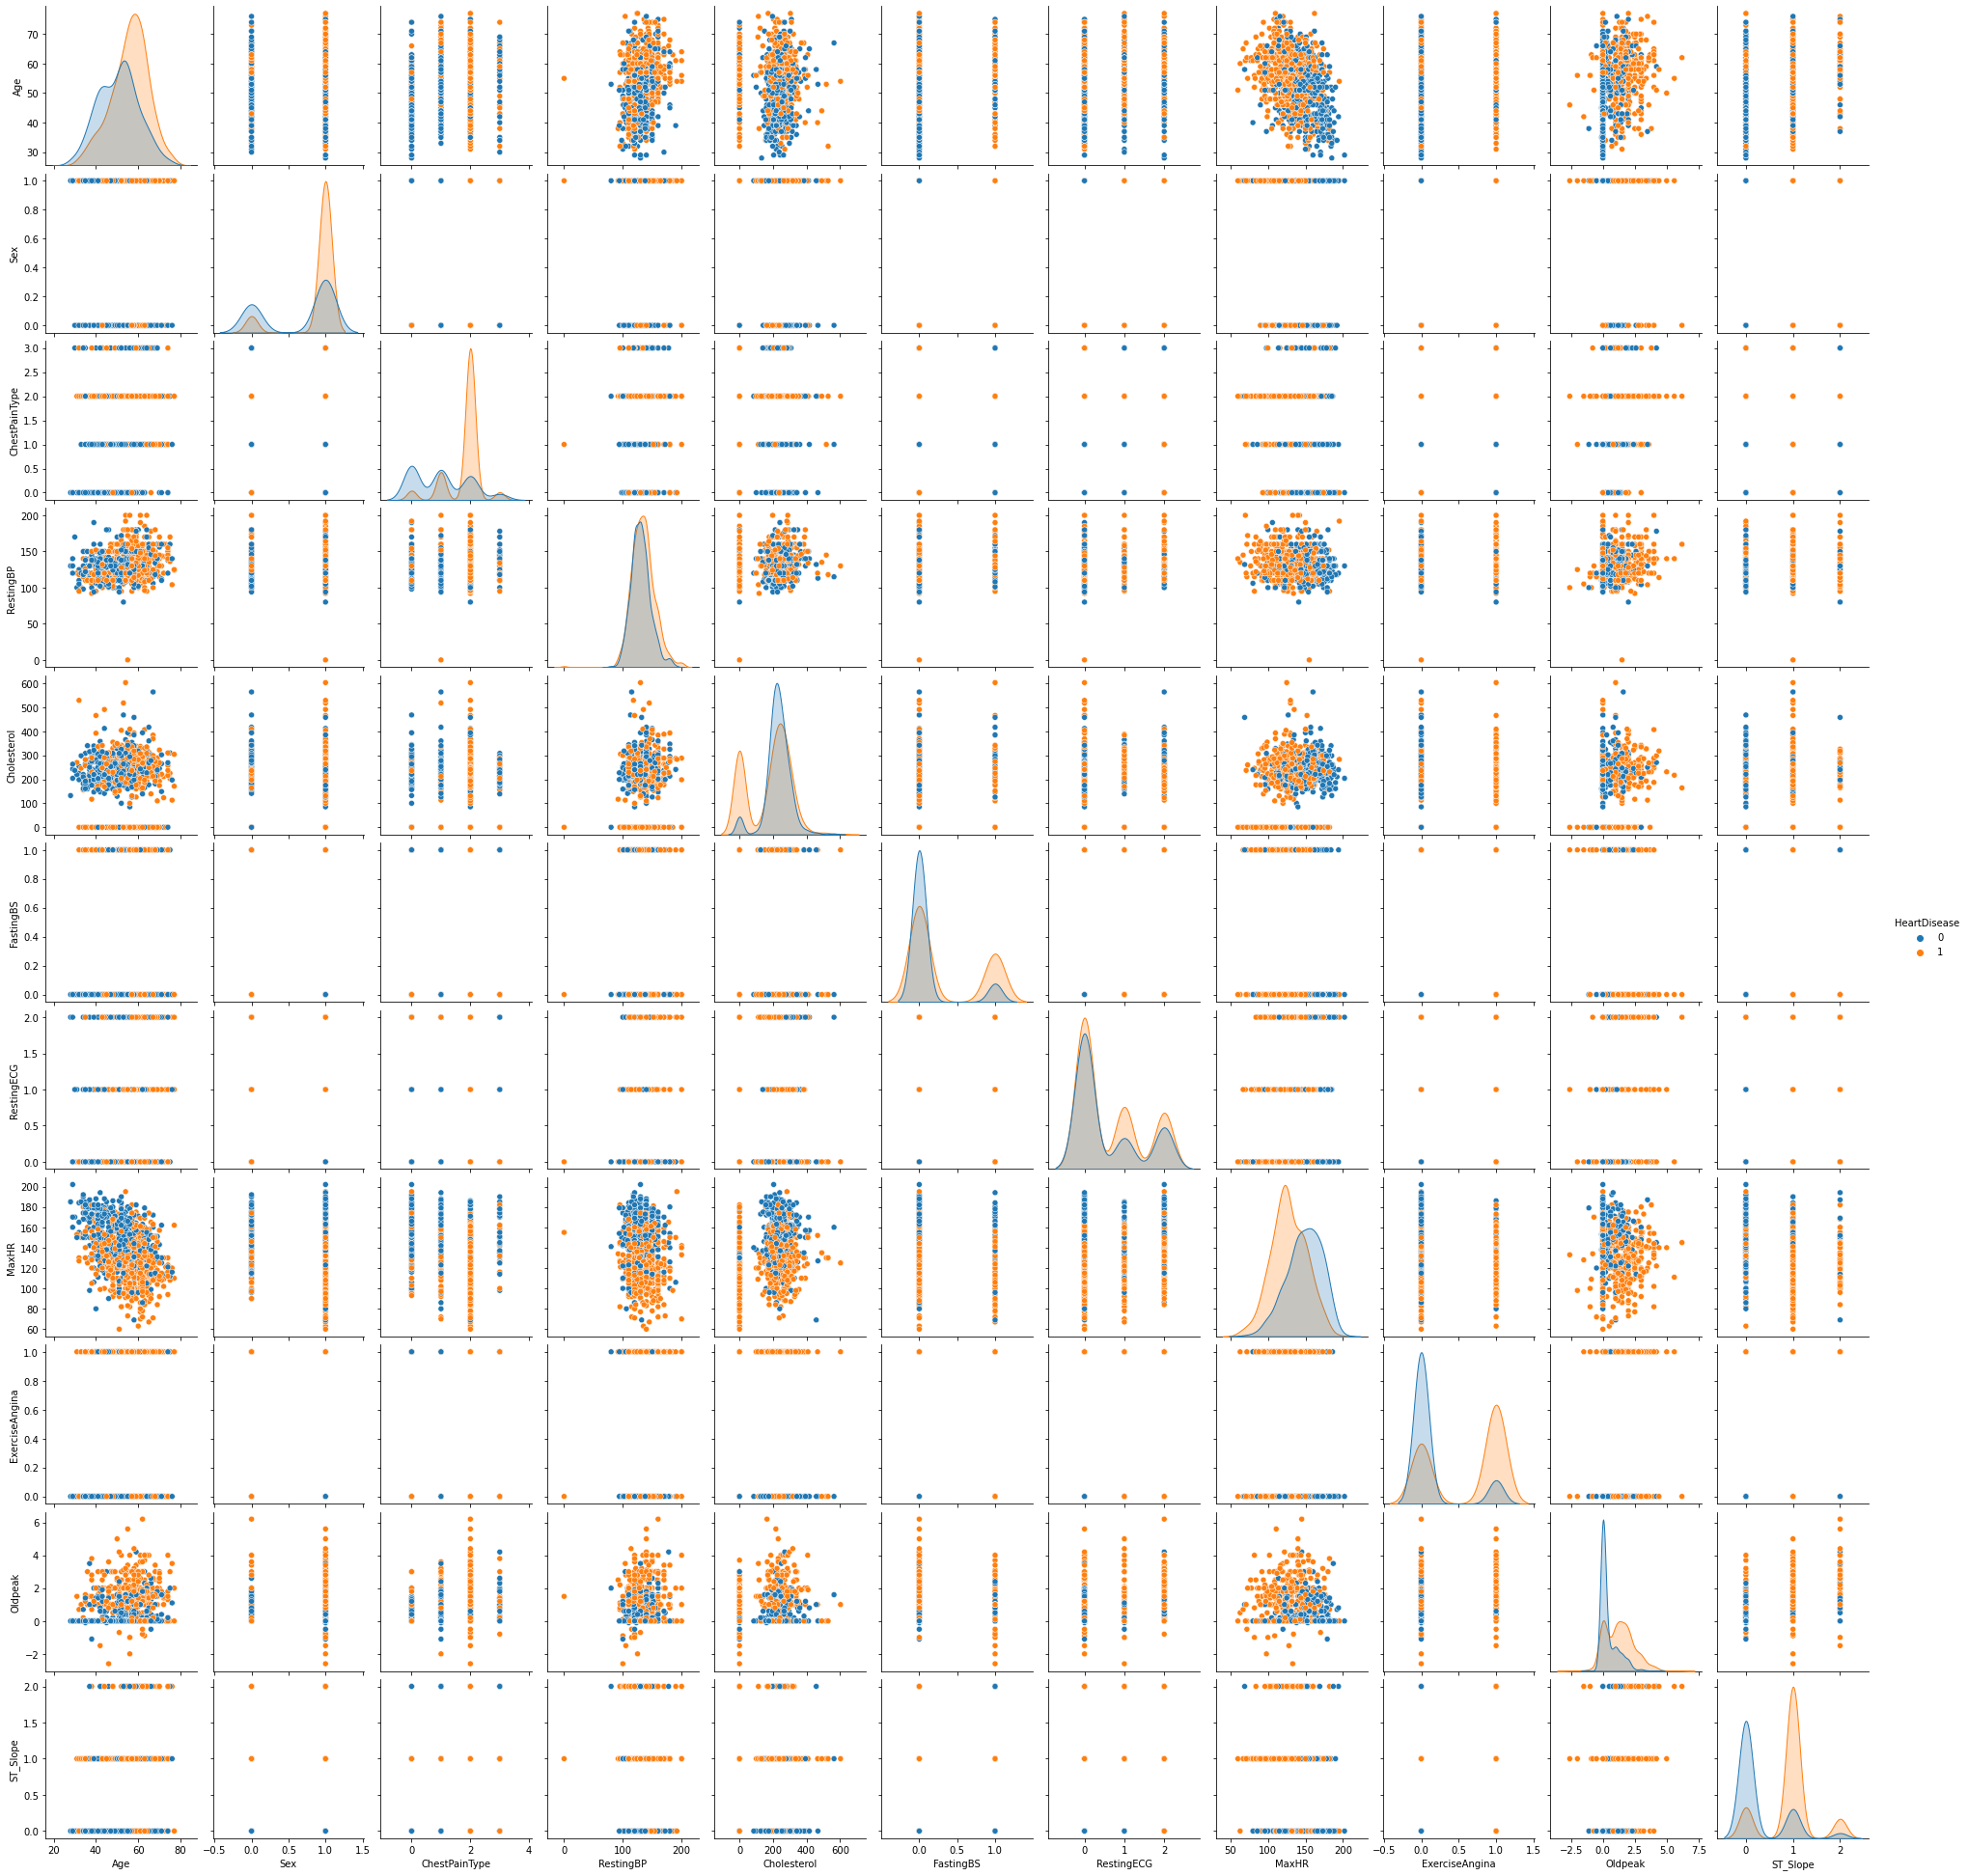

In [92]:
# view correlations between features
sns.pairplot(data=cardio_df, hue='HeartDisease')
plt.show()

# Preprocessing

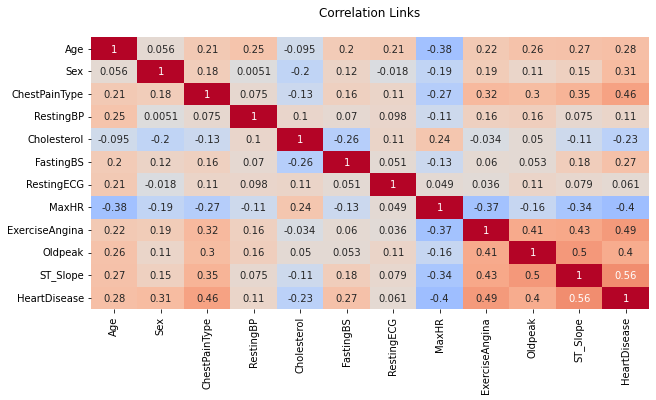

In [93]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')
sns.heatmap(cardio_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True)
plt.show()

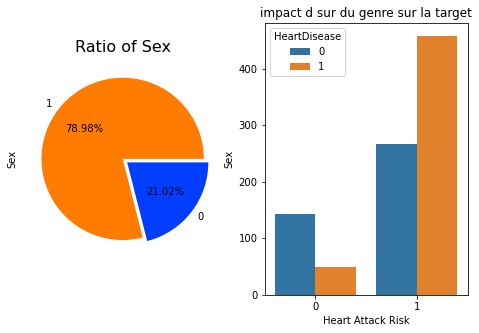

In [95]:
palette_color = sns.color_palette('bright')

plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
ax1 = cardio_df['Sex'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],

                                             autopct='%.2f%%');
ax1.set_title("Ratio of Sex", fontsize=16);

plt.subplot(1,2,2)

sns.countplot(data=cardio_df, x='Sex', hue= 'HeartDisease')
plt.title("impact d sur du genre sur la target")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Sex")
plt.show()



(Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
 31   1    2.0            120        270          0          0.0         153    1.0             1.5      1.0       1               1
 60   1    2.0            130        0            1          1.0         130    1.0             1.1      2.0       1               1
 61   0    2.0            130        330          0          2.0         169    0.0             0.0      0.0       1               1
 60   1    2.0            160        0            1          0.0         149    0.0             0.4      1.0       1               1
                                                  0          1.0         99     1.0             0.5      1.0       1               1
                                                                                                                                  ..
 53   1    2.0            120        246          0          0.0         1

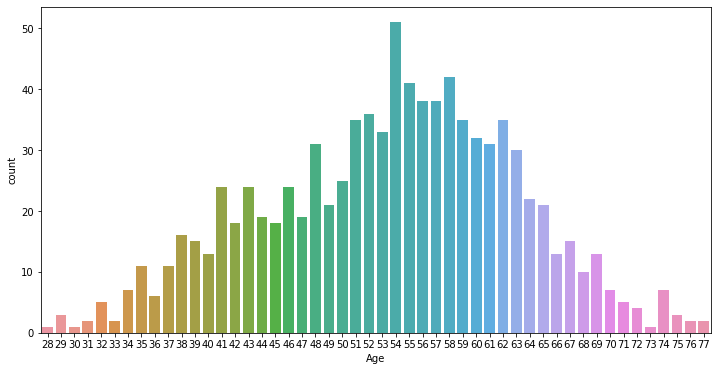

In [99]:
plt.figure(figsize=(12,6))
# view age impact
cardio_df.loc[cardio_df["HeartDisease"] ==1].value_counts(),sns.countplot(x=cardio_df["Age"])

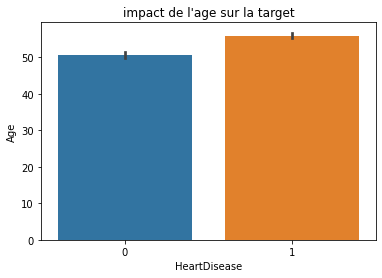

In [97]:
plt.figure(figsize=(6,4))


sns.barplot(data=cardio_df, y='Age', x='HeartDisease')
plt.title("impact de l'age sur la target")
plt.xlabel("HeartDisease")
plt.ylabel("Age")
plt.show()


# Check outliers
cardio_df

In [113]:
features_num = ['Cholesterol','RestingBP', 'MaxHR','Oldpeak']
features_cat = []
for i in cardio_df.columns:
    if i not in features_num:
        features_cat.append(i)
print(features_cat)        

['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


In [114]:
print(features_num)

['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']


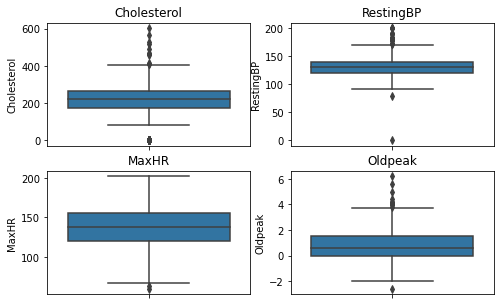

In [116]:
plt.figure(figsize=(8, 5))

for i in features_num:
  plt.subplot(2, 2, features_num.index(i)+1)
  sns.boxplot(y=i, data=cardio_df)
  plt.title(i);

# plt.subplot(3, 3, 2)
# sns.boxplot(y="trtbps", data=cardio_df)
# plt.title("trtbps Boxplot");

# plt.subplot(3, 3, 3)
# sns.boxplot(y="chol", data=cardio_df)
# plt.title("chol Boxplot");

# plt.subplot(3, 3, 4)
# sns.boxplot(y="thalachh", data=cardio_df)
# plt.title("thalachh Boxplot");


# plt.subplot(3, 3, 5)
# sns.boxplot(y="oldpeak", data=cardio_df)
# plt.title("oldpeak Boxplot");

# plt.subplot(3, 3, 6)
# sns.boxplot(y="slp", data=cardio_df)
# plt.title("slp Boxplot");

# plt.subplot(3, 3, 7)
# sns.boxplot(y="caa", data=cardio_df)
# plt.title("caa Boxplot");

# plt.subplot(3, 3, 8)
# sns.boxplot(y="thall", data=cardio_df)
# plt.title("thall Boxplot");

In [127]:
sns.lineplot(data=cardio_df, y='Cholesterol', x= 'Age', hue='HeartDisease')
plt.title("impact d sur du genre sur la target")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Cholesterol")
plt.show()


AttributeError: module 'seaborn' has no attribute 'plot'

In [128]:
# Sélectionner les indices des lignes où la valeur de Cholesterol est supérieure à 400
indices_to_drop = cardio_df[cardio_df['Cholesterol'] > 400].index

# Supprimer ces lignes du DataFrame
cardio_df.drop(indices_to_drop, inplace=True)


# Processing


In [129]:
y=cardio_df["HeartDisease"]
X=cardio_df.drop("HeartDisease",axis=1)


In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

column_transformer=ColumnTransformer([("scaler",StandardScaler(),features_num)],remainder="passthrough")
pd.DataFrame(column_transformer.fit_transform(X_test),columns=X_train.columns).head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.258354,-0.578270,-0.812911,-0.816019,44.0,0.0,2.0,0.0,1.0,0.0,0.0
1,0.472368,0.239440,0.823560,-0.816019,42.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.705837,0.881926,0.459899,-0.816019,50.0,1.0,2.0,0.0,0.0,0.0,1.0


# Modeling


In [133]:


X_train = pd.DataFrame(column_transformer.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(column_transformer.transform(X_test),columns=X_train.columns)

In [135]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

#log_predict = log_model.predict(X_test)



c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_model, X_train, y_train,cv = 10, scoring='accuracy' )

c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

array([0.84931507, 0.89041096, 0.90410959, 0.90410959, 0.80555556,
       0.79166667, 0.79166667, 0.84722222, 0.86111111, 0.84722222])

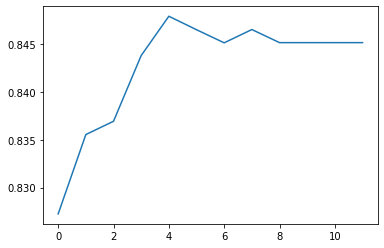

In [149]:
val_score = []
Cs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]
for c in Cs:
    score = cross_val_score(LogisticRegression(C=c,class_weight= 'balanced', max_iter=1000), X_train, y_train, cv= 10,scoring='accuracy').mean()

    val_score.append(score)
plt.plot(val_score)

In [153]:
model1 = LogisticRegression(C=4,class_weight= 'balanced')

c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

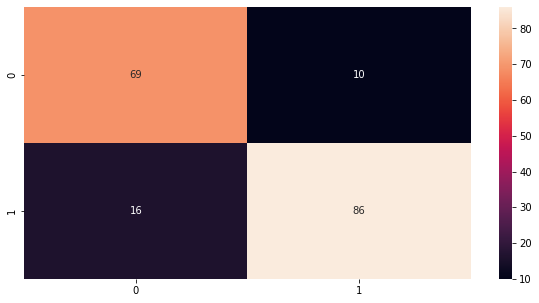

In [154]:
from sklearn.metrics import confusion_matrix
model1.fit(X_train, y_train)
conf_mat1 = confusion_matrix(y_test, model1.predict(X_test))

import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat1, annot=True)

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'C': [0.1, 1, 3, 4,5, 10, 50],
    'class_weight': ['none','balanced']
}

# Définir les hyperparamètres à ajuster
param_grid2 = {
    'criterion':['gini', 'entropy'],
    'max_depth':[5,10,20] ,
    'class_weight': ['none','balanced']
}
param_grid3 = {
    'n_neighbors': np.arange(1,20),
    'metric': ['euclidean','manhattan']
}
param_grid4 = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'class_weight': ['none', 'balanced']
}
# Initialiser le modèle et GridSearchCV
model1 = LogisticRegression(max_iter= 10000)
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()
model4 = SVC()
grid_search1 = GridSearchCV(model1, param_grid1, cv=10, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(model2, param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(model3, param_grid3, cv=5)
grid_search4 = GridSearchCV(model4, param_grid4, cv=5)


In [178]:
grid_search_list = [grid_search1, grid_search2, grid_search3, grid_search4]
for g in grid_search_list:
    # Ajuster GridSearchCV
    g.fit(X_train, y_train)

    # Afficher les meilleurs hyperparamètres et le score associé
    print("Meilleurs hyperparamètres:", g.best_params_)
    print("Meilleur score cross-validé:", g.best_score_)

    # Évaluer le modèle avec les meilleurs hyperparamètres sur l'ensemble de test
    best_model = g.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print("Score sur l'ensemble de test:", test_score)


Meilleurs hyperparamètres: {'C': 3, 'class_weight': 'none'}
Meilleur score cross-validé: 0.8506088280060882
Score sur l'ensemble de test: 0.856353591160221
Meilleurs hyperparamètres:

c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.84944444 0.81907088 0.82878352 0.83702107 0.80253831 0.79837165]
  warnings.warn(


 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5}
Meilleur score cross-validé: 0.8494444444444443
Score sur l'ensemble de test: 0.8342541436464088
Meilleurs hyperparamètres: {'metric': 'manhattan', 'n_neighbors': 19}
Meilleur score cross-validé: 0.8425383141762453
Score sur l'ensemble de test: 0.856353591160221


c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\utils\class_wei

Meilleurs hyperparamètres: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.001}
Meilleur score cross-validé: 0.8480842911877395
Score sur l'ensemble de test: 0.8674033149171271


c:\Users\Utilisateur\Rachida\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.51234674 0.79280651
 0.72237548 0.66159004        nan        nan        nan        nan
 0.71824713 0.82597701 0.82598659 0.78176245        nan        nan
        nan        nan 0.71962644 0.81772989 0.84116858 0.83704981
        nan        nan        nan        nan 0.71962644 0.78867816
 0.83838123 0.84808429]
  warnings.warn(


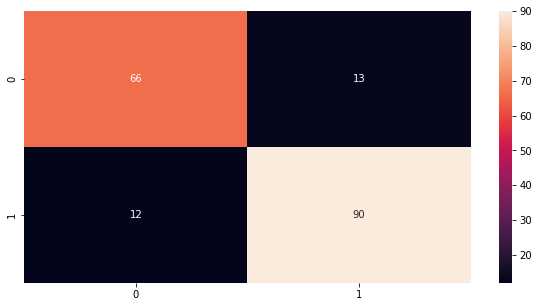

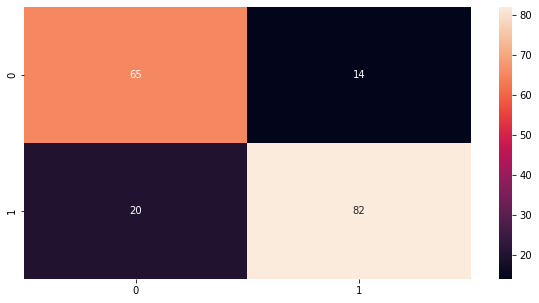

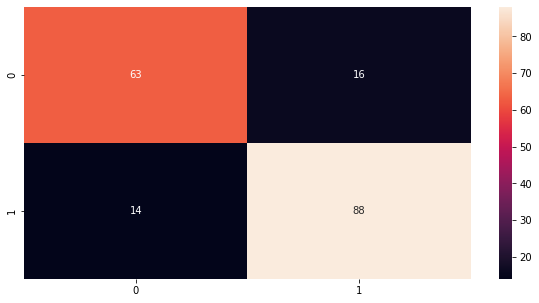

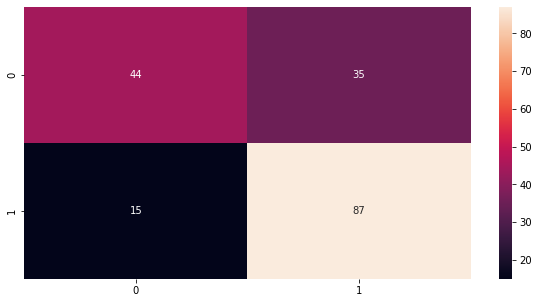

In [179]:
from sklearn.metrics import confusion_matrix
models = [model1,model2,model3,model4]
for m in models:
    m.fit(X_train, y_train)
    conf_mat = confusion_matrix(y_test, m.predict(X_test))

    import seaborn as sns
    plt.figure(figsize=(10,5))
    sns.heatmap(conf_mat, annot=True)

In [180]:
# Save Model
import joblib


# Save the model to a file
joblib.dump(model2, 'cardio_log_model.pkl')

['cardio_log_model.pkl']